# A comprehensive data analysis project on Youtube

## Data Pre-processing

In [2]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

In [3]:
# Read Data
data = pd.read_csv("US_youtube_trending_data.csv")

In [4]:
# Preview Data
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
# drop useless column
data = data.drop(["thumbnail_link", "comments_disabled", "ratings_disabled", "description"], axis=1)
data = data.drop_duplicates(subset = "video_id" ,keep="last")

In [6]:
# Check null value
data.isnull().sum()

video_id         0
title            0
publishedAt      0
channelId        0
channelTitle     0
categoryId       0
trending_date    0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
dtype: int64

## Data Exploration

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

In [8]:
# drop view_count = 0
print(len(data[data["view_count"] <= 0]))
print(len(data[data["likes"] <= 0]))
print(len(data[data["comment_count"] <= 0]))
print(len(data[data["dislikes"] <= 0]))

data = data.drop(data[data["likes"] <= 0].index, axis=0)
data = data.drop(data[data["comment_count"] <= 0].index, axis=0)
data = data.drop(data[data["view_count"] <= 0].index, axis=0)

print(data.columns)
data[["view_count","likes","comment_count"]].describe()

12
182
437
6475
Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count'],
      dtype='object')


,view_count,likes,comment_count
count,2.325800e+04,2.325800e+04,2.325800e+04
mean,2.821533e+06,1.434977e+05,1.124083e+04
std,6.934122e+06,4.003858e+05,8.638233e+04
min,4.347200e+04,1.700000e+01,4.000000e+00
25%,5.898188e+05,2.148550e+04,1.513250e+03
50%,1.202252e+06,5.157550e+04,3.352000e+03
75%,2.610916e+06,1.295885e+05,7.777500e+03
max,2.644074e+08,1.602153e+07,6.738537e+06


<AxesSubplot:xlabel='view_count', ylabel='Density'>

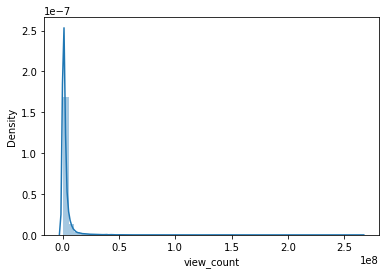

In [9]:
# Explore view_count
sns.distplot(data["view_count"],bins=50)

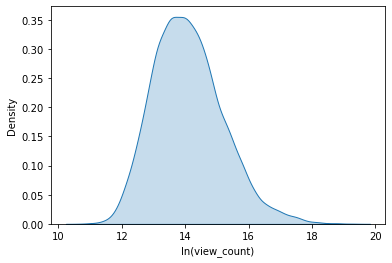

In [10]:
# Explore ln(view_count)
plt.clf()
ax = sns.distplot(np.log(data["view_count"]),hist=False, kde_kws={"shade": True})
ax.set(xlabel='ln(view_count)')
plt.show()

KstestResult(statistic=0.07964721538565644, pvalue=8.813513831500901e-129)
NormaltestResult(statistic=6992.485911812571, pvalue=0.0)


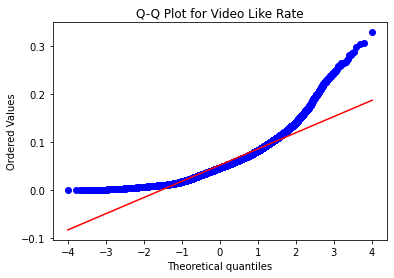

<AxesSubplot:xlabel='rate_likes', ylabel='Density'>

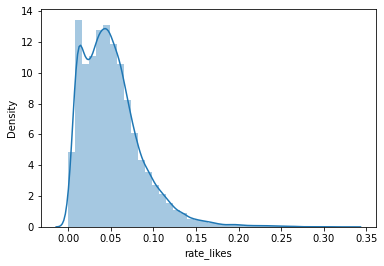

In [11]:
# Explore data['likes']/data["view_count"] 热度 popularity
data["rate_likes"] = data['likes'] / data["view_count"]

from scipy.stats import kstest
res=kstest(data["rate_likes"], 'norm', (data["rate_likes"].mean(), data["rate_likes"].std()))
print(res)

plt.clf()
print(scipy.stats.normaltest(data["rate_likes"]))
scipy.stats.probplot(data["rate_likes"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Video Like Rate")
plt.show()

sns.distplot(data["rate_likes"], hist=True, bins=40)

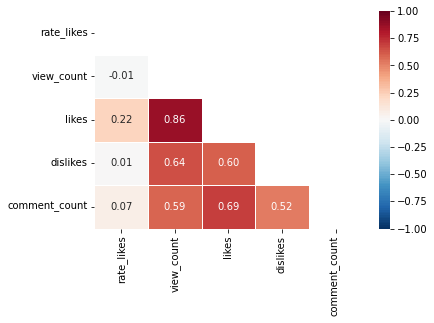

In [12]:
# Exploring correlations between data
plt.clf()
fc = data.loc[data["dislikes"] >= 0, ["rate_likes", "view_count", "likes", "dislikes", "comment_count"]].corr()
mask = np.zeros_like(fc)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(fc,mask=mask,linewidths=.5,vmin=-1,vmax=1,annot=True,fmt='.2f',cmap=sns.color_palette('RdBu_r',n_colors=128))
plt.show()

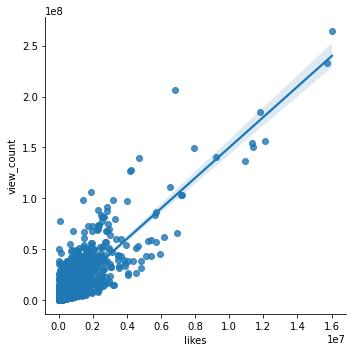

In [13]:
sns.lmplot(y = "view_count",x = 'likes', data = data)
plt.show()

<AxesSubplot:xlabel='rate_likes'>

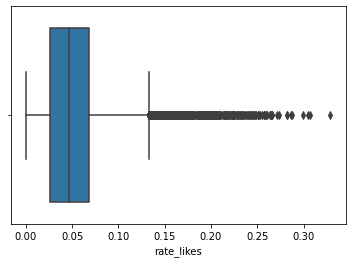

In [14]:
# Observation and deleting abnormal rate_likes values
sns.boxplot(data["rate_likes"])

# error = data[np.abs(data["rate_likes"] - data["rate_likes"].mean()) > 3 * data["rate_likes"].std()]
# data = data.drop(error.index)

In [15]:
from pyecharts.charts import Line,Pie,Grid,Bar,Page
import pyecharts.options as opts

play_message = data.groupby(['channelTitle'])

play_com = play_message['channelTitle'].agg(['count']).sort_values('count',ascending = False)[:15]
play_com.reset_index(inplace=True)

attr = play_com['channelTitle']
v1 = play_com['count']


pie = Pie(init_opts=opts.InitOpts(width="1100px", height="600px"))

pie.add("", [list(z) for z in zip(attr, v1)], radius=["40%", "70%"])

pie.set_global_opts(title_opts=opts.TitleOpts(title="TOP15 Video Count Channel", pos_left="center", pos_top="top"),
                        legend_opts=opts.LegendOpts(orient="vertical", pos_left="1%",pos_bottom="20%"),
                        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}}))

pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True, formatter="{b}: {d}%"))

pie.render_notebook()

In [16]:
item_cum=data['channelTitle'].value_counts().sort_values(ascending=False).cumsum()/len(data['view_count'])
x=range(len(item_cum)+1)

line7 = (
    Line()
    .add_xaxis(x)
    .add_yaxis('Percentage of Cumulative view_count', item_cum.values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='Trends in the Percentage of Cumulative view_count by Channel',pos_left="50%"),
        legend_opts=opts.LegendOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(name='Percentage of Cumulative view_count'),
        xaxis_opts=opts.AxisOpts(name='Number of Channel'),
        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}})
        
    )
    .set_series_opts (label_opts=opts.LabelOpts(is_show=False))
)
line7.render_notebook()

In [17]:
data[data["channelTitle"] == "MrBeast"]["view_count"].sum()

data2 = data.groupby('channelTitle')['view_count'].sum()
data2 = pd.DataFrame(data2.sort_values( ascending=False))

attr = data2.index[0:15]
v1 = [float('%.1f' % (float(i) / 1000000)) for i in data2['view_count'][0:15]]
 
bar = Bar(init_opts=opts.InitOpts(width="800px", height="400px"))
bar.add_xaxis(list(reversed(attr.tolist())))
bar.add_yaxis("", list(reversed(v1)),color = 'green')
bar.set_global_opts(title_opts=opts.TitleOpts(title="", pos_left="center", pos_top="18"),
                        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}}),
                        xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)))
bar.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="right", color="black"))
bar.reversal_axis()
bar.render_notebook()

In [18]:
# Fill category
import json

category_rp = dict()
with open("US_category_id.json",'r') as f:
    category_dict = json.load(f)["items"]
    for i in category_dict:
        category_rp[int(i["id"])] = i["snippet"]["title"]
print(category_rp)
    
data['categoryId'] = data['categoryId'].replace(category_rp)
data.rename(columns={'categoryId':'category'},inplace=True)
data.head()

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


,video_id,title,publishedAt,channelId,channelTitle,category,trending_date,tags,view_count,likes,dislikes,comment_count,rate_likes
172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07T18:30:06Z,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,Howto & Style,2020-08-12T00:00:00Z,how to make a curried egg sandwich|curried egg...,1238677,104736,3736,13876,0.084555
173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07T09:30:04Z,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,Entertainment,2020-08-12T00:00:00Z,cake rescue|caek fail|viral cake fails|funny c...,938198,44088,565,2409,0.046992
174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06T19:47:12Z,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,Entertainment,2020-08-12T00:00:00Z,[None],1722152,169501,927,7263,0.098424
175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09T01:35:42Z,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,News & Politics,2020-08-12T00:00:00Z,president|trump|donald|executive|orders|stimul...,1090847,10922,2517,9876,0.010012
176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06T23:01:42Z,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,Entertainment,2020-08-12T00:00:00Z,warner bros|warner brothers|wb|fred hampton|wi...,971704,23311,1987,3240,0.023990


In [19]:
# Explore category

play_message = data.groupby(['category'])

play_com = play_message['view_count'].agg(['sum']).sort_values('sum',ascending = False)[:10]
play_com.reset_index(inplace=True)

attr = play_com['category']
v1 = play_com['sum']


pie = Pie(init_opts=opts.InitOpts(width="1100px", height="600px"))

pie.add("", [list(z) for z in zip(attr, v1)], radius=["0%", "70%"])

pie.set_global_opts(title_opts=opts.TitleOpts(title="T", pos_left="center", pos_top="top"),
                        legend_opts=opts.LegendOpts(orient="vertical", pos_left="1%",pos_bottom="30%"),
                        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}}))

pie.set_series_opts(label_opts=opts.LabelOpts(is_show=True, formatter="{b}: {d}%"))

pie.render_notebook()

In [20]:
# Exploring date

# trending_date modified
data["trending_month"] = data["trending_date"].astype("str").str.slice(0,7)
date_count = data.groupby("trending_month").size()

date_view_all = data.groupby("trending_month")["view_count"].sum()

date_view = data.groupby("trending_month")["view_count"].sum() / date_count
date_likes = data.groupby("trending_month")["likes"].sum() / date_count
date_dislikes = data.groupby("trending_month")["dislikes"].sum() / date_count
date_comment = data.groupby("trending_month")["comment_count"].sum() / date_count

In [21]:
date_view.index = date_view.index.astype("str")
date_view.index

Index(['2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01',
       '2022-02', '2022-03', '2022-04', '2022-05'],
      dtype='object', name='trending_month')

In [22]:
from pyecharts.charts import Line,Pie,Grid,Bar,Page
import pyecharts.options as opts

line1 = (
    Line()
    .add_xaxis(date_view.index.tolist())
    .add_yaxis('视频平均播放量', date_view.values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='视频平均播放量变化趋势',pos_left="20%"),
        legend_opts=opts.LegendOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(name='视频平均播放量'),
        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}})
    )
    .set_series_opts (label_opts=opts.LabelOpts(is_show=False))
)

line2 = (
    Line()
    .add_xaxis(date_comment.index.tolist())
    .add_yaxis('视频平均评论数量', date_comment.values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='视频平均评论数量变化趋势',pos_right="20%"),
        legend_opts=opts.LegendOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(name='视频平均评论数量'),
        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}})
    )
    .set_series_opts (label_opts=opts.LabelOpts(is_show=False))
)

line3 = (
    Line()
    .add_xaxis(date_likes.index.tolist())
    .add_yaxis('视频平均点赞数', date_likes.values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='视频平均点赞数变化趋势',pos_top="50%",pos_left="20%"),
        legend_opts=opts.LegendOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(name='视频平均点赞数'),
        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}})
    )
    .set_series_opts (label_opts=opts.LabelOpts(is_show=False))
)


line4 = (
    Line()
    .add_xaxis(date_count.index.tolist())
    .add_yaxis('趋势视频数量', date_count.values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title='趋势视频数量变化趋势',pos_top="50%",pos_right="20%"),
        legend_opts=opts.LegendOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(name='趋势视频数量'),
        toolbox_opts=opts.ToolboxOpts(is_show=True, feature={"saveAsImage": {}})
    )
    .set_series_opts (label_opts=opts.LabelOpts(is_show=False))
)

grid1 = (
    Grid()
    .add(line1, grid_opts=opts.GridOpts(pos_bottom="60%",pos_right="55%"))
    .add(line2, grid_opts=opts.GridOpts(pos_bottom="60%",pos_left="55%"))
    .add(line3, grid_opts=opts.GridOpts(pos_top="60%",pos_right="55%"))
    .add(line4, grid_opts=opts.GridOpts(pos_top="60%",pos_left="55%"))
    
 )   
grid1.render_notebook()